In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

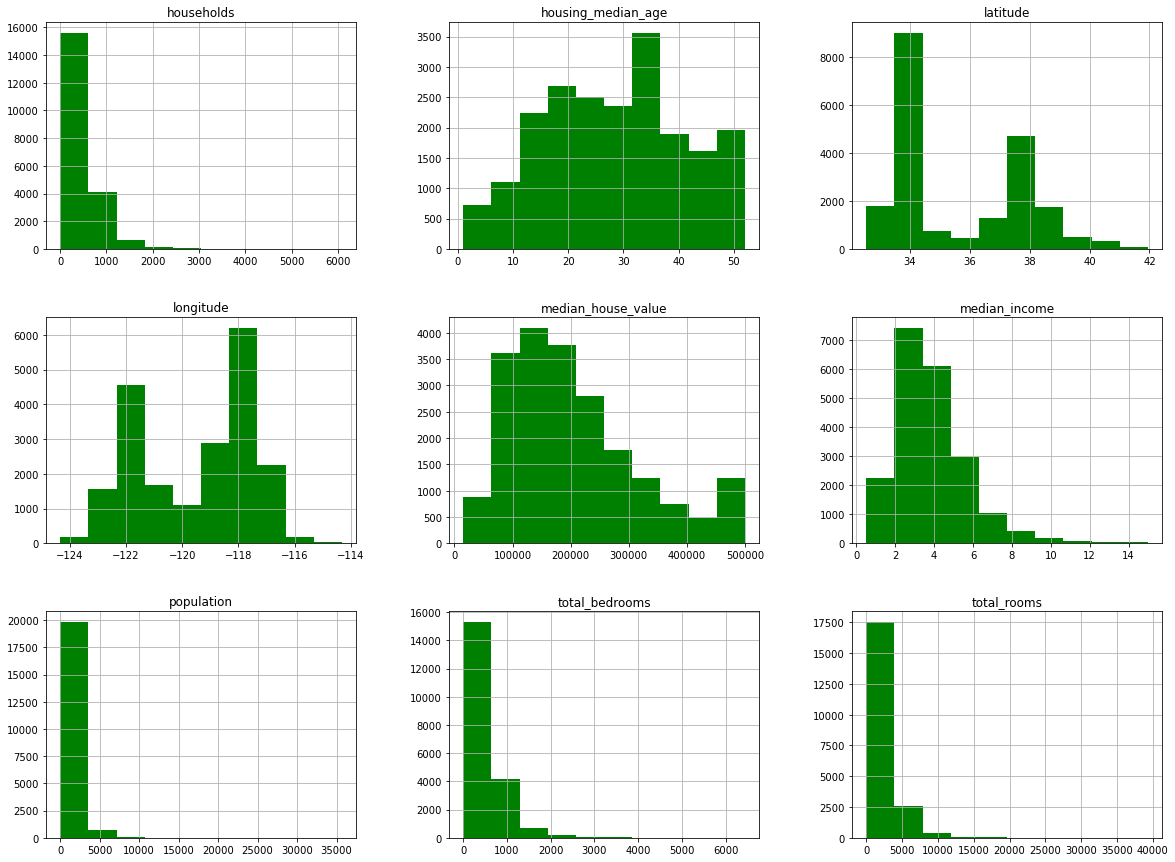

In [128]:
data = pd.read_csv('housing.csv')
data.info()
print(data.describe())
data.head()
data.hist(figsize = (20,15),color = 'green')
plt.show()

In [129]:
#Chech for NULL values
data  = data.dropna(axis = 0)
x_data = data.drop(data.columns[[8,9]], axis = 1)
y_data = data['median_house_value']
# x_data = x_data[y_data < 500000]
# y_data = y_data[y_data < 500000]
# print(y_data)

In [130]:
#Train Test split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 101)

In [131]:
# Normalization
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5811,0.606574,0.168969,0.705882,0.035124,0.072781,0.033129,0.074001,0.137936
18444,0.252988,0.500531,0.078431,0.050181,0.080540,0.024048,0.072192,0.272865
5928,0.652390,0.165781,0.235294,0.076148,0.076660,0.033185,0.076139,0.396250
15955,0.189243,0.549416,1.000000,0.042118,0.049814,0.030354,0.053445,0.231611
9008,0.572709,0.163656,0.764706,0.021975,0.027933,0.011099,0.028778,0.442070


In [132]:
poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree = 2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train,y_train)
print(
    poly_reg.score(X_train,y_train),
    poly_reg.score(X_test,y_test)
)

0.7007071801394507 0.691302319016889


In [133]:
y_pred = poly_reg.predict(X_test)
# plt.scatter(y_test[:,1]，y_pred)
print(y_test)

14561    237300.0
1571     386600.0
4201     176700.0
4670     250000.0
6251     163300.0
           ...   
12255    120700.0
8544     275000.0
7513     111900.0
16766    264300.0
17048    495900.0
Name: median_house_value, Length: 4087, dtype: float64


14561    0.028864
1571     0.085040
4201     0.053849
4670     0.257604
6251     0.045624
           ...   
12255    0.031347
8544     0.051986
7513     0.049193
16766    0.079299
17048    0.073246
Name: total_bedrooms, Length: 4087, dtype: float64


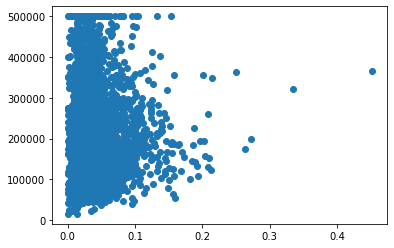

In [134]:
# plt.scatter(X_test[4],y_test)
print(X_test.iloc[:,4])
plt.scatter(X_test.iloc[:,5],y_test)